In [2]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.qcomo import qevolve, clevolve
from qsextra.tools import spectral_function
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

The ChromophoreSystem object accounts for the excitonic and vibrational degrees of freedom. The Hamiltonian is
$$
\hat{H} = \hat{H}^\text{e} + \hat{H}^\text{p} + \hat{H}^\text{ep}
$$

$$
\hat{H}^\text{e} = - \sum_{i=1}^N \frac{\epsilon_i}{2} \hat{\sigma}_i^z + \sum_{i=1}^{N-1} \sum_{j>i} J_{ij} \left( \hat{\sigma}_i^+\hat{\sigma}_j^- + \hat{\sigma}_i^- \hat{\sigma}_j^+ \right)
$$

$$
\hat{H}^\text{p} = \sum_{i=1}^N \sum_{k} \omega_{k} \hat{a}_{ik}^\dagger \hat{a}_{ik}
$$

$$
\hat{H}^\text{ep} = \sum_{i=1}^N | e_i \rangle \langle e_i | \sum_{k} g_{k} \left( \hat{a}_{ik}^\dagger + \hat{a}_{ik} \right)
$$

This framework can be used to implement pseudomodes. In this case $g_{k} = \sqrt{\Gamma_k \Omega_k / 2}$.

In [3]:
epsilon = [1, 2]
J = toeplitz([0., 1.])

esys = ExcitonicSystem(energies=epsilon, couplings=J)
esys.set_state(state_type='localized excitation', state=0)

/home/juu8242/opt/anaconda3/envs/qsextra/lib/python3.11/site-packages/qsextra/system/system.py:81: UserWarning: Equal dipole moments are considered.
  warnings.warn('Equal dipole moments are considered.')


In [4]:
sys = ChromophoreSystem(excitonic_system=esys)

In [5]:
frequencies_pseudomode = [0]
Gamma = [2]
Omega = [1]

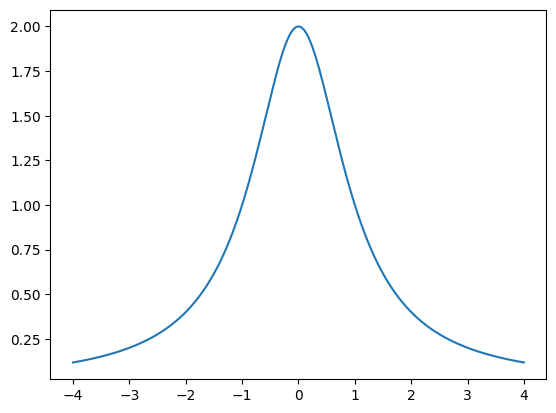

In [5]:
fr, sf = spectral_function(frequencies_pseudomode, Gamma, Omega)
plt.plot(fr, sf)

In [9]:
sys.pseudomodes(frequencies_pseudomode=frequencies_pseudomode,
                levels_pseudomode=[2]*len(frequencies_pseudomode),
                couplings_ep=np.sqrt(
                    np.array(Gamma)*np.array(Omega)/2).tolist(),
                )

In [7]:
sys.get_e_Hamiltonian()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-1.5  0.   0.   0. ]
 [ 0.  -0.5  1.   0. ]
 [ 0.   1.   0.5  0. ]
 [ 0.   0.   0.   1.5]]

In [8]:
sys.get_p_Hamiltonian()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0.]
 [0. 0.]]

In [9]:
sys.get_ep_Hamiltonian()

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]

In [10]:
sys.get_global_Hamiltonian()

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  1.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   1.  -0.5  0.   0.   0.   1.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  1.   0.   0.   1.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.  -0.5  0.   0.   0.   1.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.5  0.   1.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.5  0.   1.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.   0.   1.

In [11]:
sys.todict()

{'class': qsextra.system.system.ChromophoreSystem,
 'system_size': 2,
 'e_el': [1, 2],
 'dipole_moments': [1.0, 1.0],
 'coupl_el': [[0.0, 1.0], [1.0, 0.0]],
 'validity': True,
 'state_type': 'localized excitation',
 'state': 0,
 'mode_dict': {'omega_mode': [0],
  'lvl_mode': [2],
  'coupl_ep': [1.0],
  'state_mode': [[(1+0j), 0j]]}}

In [6]:
dt = 0.01
time = np.arange(0, 20, dt*100)
shots = 8000

# Unitary dynamics

The dynamics is driven by the Schrödinger equation
$$
\frac{d \psi (t)}{dt} =
-i \hat{H} \psi (t)
$$

Quantum algorithm (Qiskit Aer Simulation)

In [13]:
results = qevolve(sys, time, shots=shots, dt=dt)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i, nc] = c['{:b}'.format(1 << i).zfill(len(epsilon))]/shots
        except:
            P[i, nc] = 0

Start creating the circuits...
SparsePauliOp(['X'],
              coeffs=[1.+0.j])
Circuits created...
Start measuring the circuits...
Your real strength comes from being the best "You" you can be. [Po]


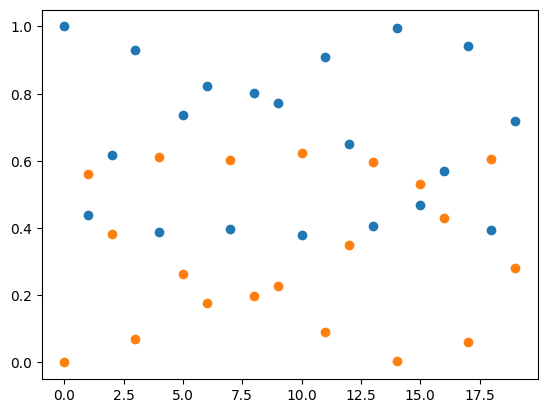

In [14]:
[plt.scatter(time, P[i, :]) for i in range(len(epsilon))]

Classical algorithm (Qutip sevolve)

In [15]:
t_list = np.arange(0, 20, dt)
results_qutip = clevolve(sys, t_list, measure_populations=True)

P_qutip = results_qutip.expect
error = []
for i in range(len(epsilon)):
    error.append(
        np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

Yesterday is history, tomorrow is a mystery, but today is a gift. That's why it's called the present. [Master Oogway]


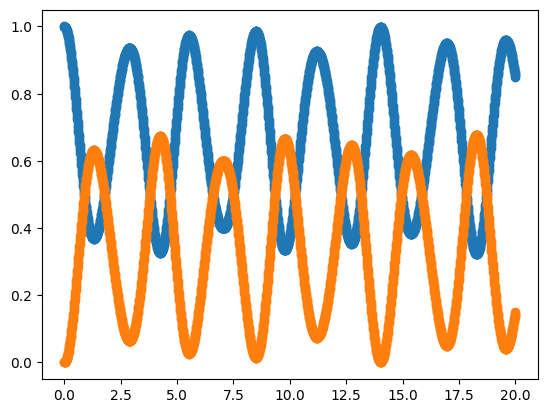

In [16]:
[plt.scatter(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:

- P1

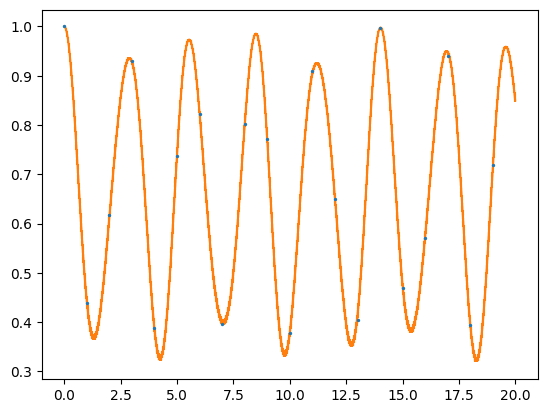

In [17]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0, :], s=2, c='tab:blue', zorder=1)

- P2

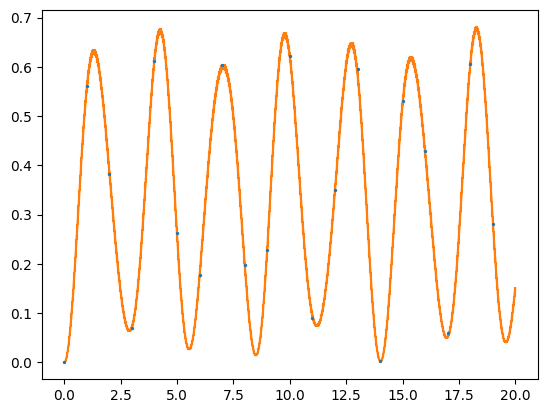

In [18]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1, :], s=2, c='tab:blue', zorder=1)

# Dephasing

The dynamics is ruled by a Lindblad-form quanutm master equation with dissipation on the pseudomodes
$$
\frac{d \rho (t)}{dt} =
-i \left[ \hat{H}, \rho (t) \right] +
2 \sum_{i=1}^N
\sum_k \Omega_k
\left(
\hat{a}_{ik} \rho (t) \hat{a}_{ik}^\dagger -
\frac{1}{2} \left[ \hat{a}_{ik}^\dagger \hat{a}_{ik}, \rho (t) \right]_+
\right)
$$

In [7]:
coll_rate = (2 * np.array(Omega)).tolist()

Quantum algorithm (Qiskit Aer Simulation)

In [8]:
results = qevolve(sys, time, shots=shots, dt=dt, coll_rates=coll_rate)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i, nc] = c['{:b}'.format(1 << i).zfill(len(epsilon))]/shots
        except:
            P[i, nc] = 0

/home/juu8242/opt/anaconda3/envs/qsextra/lib/python3.11/site-packages/qsextra/qcomo/evolution/qevolve.py:538: UserWarning: Pseudomodes not specified. Executing the dynamics with system as an ExcitonicSystem.
  warnings.warn(


TypeError: For an ExcitonicSystem, coll_rates must be a scalar.

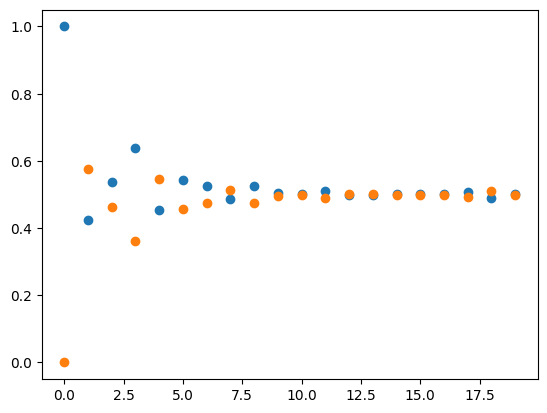

In [20]:
[plt.scatter(time, P[i, :]) for i in range(len(epsilon))]

Classical algorithm (Qutip mevolve)

In [20]:
t_list = np.arange(0, 20, dt)
results = clevolve(sys, t_list, coll_rate, measure_populations=True)

P_qutip = results.expect
error = []
for i in range(len(epsilon)):
    error.append(
        np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

The hardcore do understand. [Tigress]


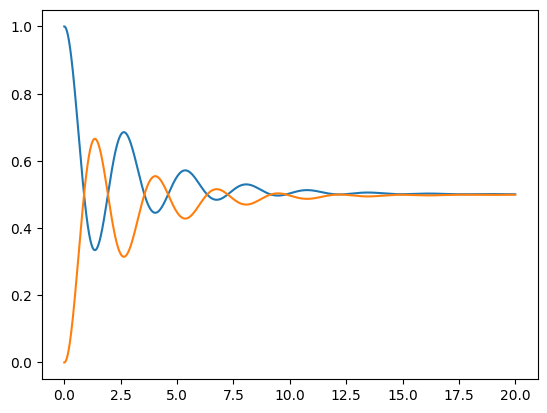

In [21]:
[plt.plot(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:

- P1

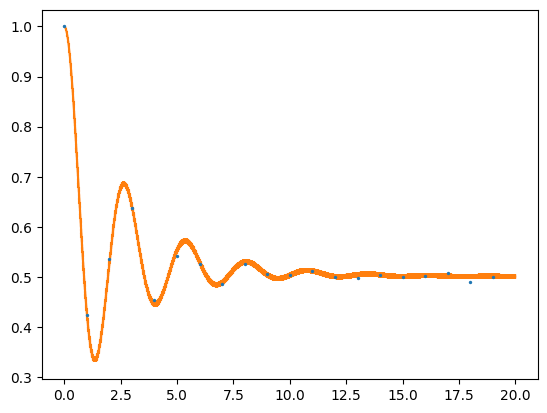

In [23]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0, :], s=2, c='tab:blue', zorder=1)

- P2

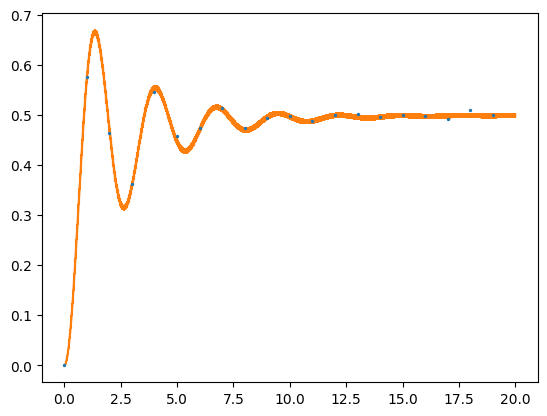

In [24]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1, :], s=2, c='tab:blue', zorder=1)